In [25]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

In [4]:
model = keras.models.load_model('xception_v4_1_06_0.880.h5')

In [9]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [7]:
img = load_img('pants.jpg', target_size=(299, 299))

x = np.array(img)
X = np.array([x])

X = preprocess_input(X)

In [15]:
preds = model.predict(X)

1/1 [==============================] - 0s 55ms/step


In [16]:
preds

array([[-2.9856071 , -3.0216744 , -2.064952  , -0.22239421,  8.601137  ,
        -0.37114146, -4.3894835 ,  1.9760909 , -3.807399  , -4.485621  ]],
      dtype=float32)

In [20]:
clases = {'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [21]:
classes = list(clases.keys())
classes

['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

In [22]:
dict(zip(classes, preds[0]))

{'dress': -2.9856071,
 'hat': -3.0216744,
 'longsleeve': -2.064952,
 'outwear': -0.22239421,
 'pants': 8.601137,
 'shirt': -0.37114146,
 'shoes': -4.3894835,
 'shorts': 1.9760909,
 'skirt': -3.807399,
 't-shirt': -4.485621}

## Convert keras to TF-Lite

In [26]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('clothing-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\daniel\AppData\Local\Temp\tmp6ew0oi4j\assets


INFO:tensorflow:Assets written to: C:\Users\daniel\AppData\Local\Temp\tmp6ew0oi4j\assets


In [27]:
import tensorflow.lite as tflite

In [28]:
interpreter = tflite.Interpreter(model_path='clothing-model.tflite') # Carga el modelo
interpreter.allocate_tensors() # Esto es necesario para reservar memoria para el modelo

input_index = interpreter.get_input_details()[0]['index'] # Obtiene el índice del tensor de entrada
output_index = interpreter.get_output_details()[0]['index'] # Obtiene el índice del tensor de salida

In [34]:
interpreter.set_tensor(input_index, X) # Establece el tensor de entrada con los datos de entrada X
interpreter.invoke() # Ejecuta la inferencia

preds = interpreter.get_tensor(output_index) # Obtiene los resultados de la inferencia

In [38]:
dict(zip(classes, preds[0]))

{'dress': -2.9856067,
 'hat': -3.0216718,
 'longsleeve': -2.064953,
 'outwear': -0.2223932,
 'pants': 8.601136,
 'shirt': -0.3711395,
 'shoes': -4.389481,
 'shorts': 1.9760889,
 'skirt': -3.807399,
 't-shirt': -4.4856215}

## Removing TF dependency

In [39]:
from PIL import Image

In [43]:
with Image.open('pants.jpg') as img:
    img = img.resize((299, 299), Image.NEAREST)

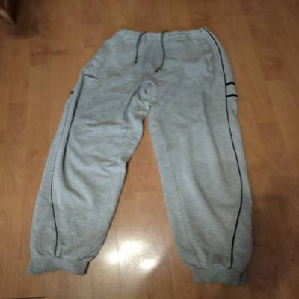

In [44]:
img

In [48]:
def preprocess_input(x):
    x /= 127.5
    x -= 1.
    return x

In [49]:
x = np.array(img, dtype=np.float32)
X = np.array([x])

X = preprocess_input(X)

In [50]:
interpreter.set_tensor(input_index, X) # Establece el tensor de entrada con los datos de entrada X
interpreter.invoke() # Ejecuta la inferencia

preds = interpreter.get_tensor(output_index) # Obtiene los resultados de la inferencia

In [51]:
dict(zip(classes, preds[0]))

{'dress': -2.9856067,
 'hat': -3.0216718,
 'longsleeve': -2.064953,
 'outwear': -0.2223932,
 'pants': 8.601136,
 'shirt': -0.3711395,
 'shoes': -4.389481,
 'shorts': 1.9760889,
 'skirt': -3.807399,
 't-shirt': -4.4856215}

## Simpler way of doing it

In [52]:
# !pip install keras-image-helper

In [53]:
import tensorflow.lite as tflite

from keras_image_helper import create_preprocessor

In [ ]:
interpreter = tflite.Interpreter(model_path='clothing-model.tflite') # Carga el modelo
interpreter.allocate_tensors() # Esto es necesario para reservar memoria para el modelo

input_index = interpreter.get_input_details()[0]['index'] # Obtiene el índice del tensor de entrada
output_index = interpreter.get_output_details()[0]['index'] # Obtiene el índice del tensor de salida

In [54]:
preprocessor = create_preprocessor('xception', target_size=(299, 299))

In [55]:
url = 'http://bit.ly/mlbookcamp-pants'
X = preprocessor.from_url(url)

In [56]:
interpreter.set_tensor(input_index, X) # Establece el tensor de entrada con los datos de entrada X
interpreter.invoke() # Ejecuta la inferencia

preds = interpreter.get_tensor(output_index) # Obtiene los resultados de la inferencia

In [57]:
dict(zip(classes, preds[0]))

{'dress': -1.7805183,
 'hat': -3.75797,
 'longsleeve': -2.6266322,
 'outwear': -0.6393208,
 'pants': 8.415912,
 'shirt': -1.7304688,
 'shoes': -4.369091,
 'shorts': 2.1222525,
 'skirt': -2.0549507,
 't-shirt': -4.238372}

## Finally

In [9]:
# !pip install https://github.com/alexeygrigorev/tflite-aws-lambda/raw/main/tflite/tflite_runtime-2.14.0-cp310-cp310-linux_x86_64.whl

ERROR: tflite_runtime-2.14.0-cp310-cp310-linux_x86_64.whl is not a supported wheel on this platform.


In [2]:
import tensorflow.lite as tflite # se supone que se comenta este
# import tflite_runtime.interpreter as tflite
from keras_image_helper import create_preprocessor

In [3]:
interpreter = tflite.Interpreter(model_path='clothing-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [4]:
preprocessor = create_preprocessor('xception', target_size=(299, 299))

In [5]:
url = 'http://bit.ly/mlbookcamp-pants'
X = preprocessor.from_url(url)

In [6]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [7]:
clases = {'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

classes = list(clases.keys())

In [8]:
dict(zip(classes, preds[0]))

{'dress': -1.7805183,
 'hat': -3.75797,
 'longsleeve': -2.6266322,
 'outwear': -0.6393208,
 'pants': 8.415912,
 'shirt': -1.7304688,
 'shoes': -4.369091,
 'shorts': 2.1222525,
 'skirt': -2.0549507,
 't-shirt': -4.238372}